In [1]:
def CAL(ret1,ret2,var1,var2,cov,p1,p2):
    retEquation = (p1*ret1+p2*ret2)
    variance = p1**2*var1+p2**2*var2+2*p1*p2*cov
    print(retEquation)
    print(variance)
    print("")

In [2]:
for x in range(0,101):
    fract = x/100
    CAL(.03,.08,0,.35,0,1-fract,fract)

0.03
0.0

0.030499999999999996
3.5e-05

0.031
0.00014

0.0315
0.00031499999999999996

0.032
0.00056

0.0325
0.0008750000000000001

0.032999999999999995
0.0012599999999999998

0.0335
0.0017150000000000002

0.034
0.00224

0.0345
0.002835

0.035
0.0035000000000000005

0.0355
0.004234999999999999

0.036
0.005039999999999999

0.0365
0.005915

0.037000000000000005
0.006860000000000001

0.0375
0.007875

0.038
0.00896

0.0385
0.010115

0.039
0.01134

0.0395
0.012634999999999999

0.04
0.014000000000000002

0.040499999999999994
0.015434999999999997

0.041
0.016939999999999997

0.041499999999999995
0.018515

0.041999999999999996
0.020159999999999997

0.042499999999999996
0.021875

0.043
0.02366

0.0435
0.025515

0.044
0.027440000000000003

0.0445
0.029434999999999996

0.045
0.0315

0.0455
0.033635

0.046
0.03584

0.0465
0.038115

0.047
0.04046

0.0475
0.04287499999999999

0.048
0.04536

0.0485
0.04791499999999999

0.049
0.050539999999999995

0.0495
0.053235000000000005

0.05
0.05600000000000001



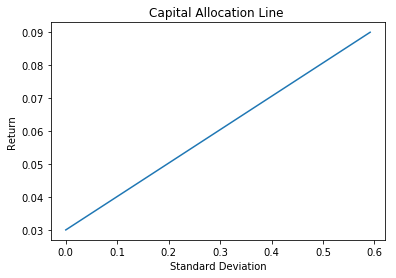

In [3]:
import matplotlib.pyplot as plt
def CAL(ret1,ret2,var1,var2,cov):
    returns = [(1-x/100)*ret1+(x/100)*ret2 for x in range(0,101)]
    variances = [(1-x/100)**2*var1+(x/100)**2*var2+2*(1-x/100)*(x/100)*cov for x in range(0,101)]
    standardDevs = [x**.5 for x in variances]
    plt.plot(standardDevs,returns)
    plt.xlabel("Standard Deviation")
    plt.ylabel("Return")
    plt.title("Capital Allocation Line ")
    plt.show()
CAL(.03,.09,0,.35,0)

In [4]:
def SharpeRatio(rf,ret,SD):
    return (ret-rf)/SD

In [5]:
import matplotlib.pyplot as plt
def CAL(ret1,ret2,var1,var2,cov):
    returns = [(1-x/100)*ret1+(x/100)*ret2 for x in range(0,201)]
    variances = [(1-x/100)**2*var1+(x/100)**2*var2+2*(1-x/100)*(x/100)*cov for x in range(0,201)]
    standardDevs = [x**.5 for x in variances]
    plt.plot(standardDevs,returns)
    plt.xlabel("Standard Deviation")
    plt.ylabel("Return")
    plt.title("Capital Allocation Line ")
    plt.show()

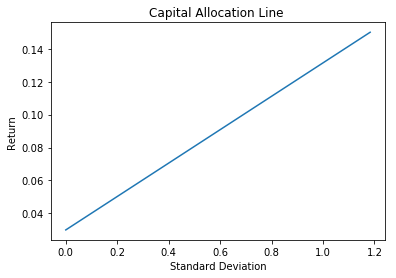

0.10141851056742199


In [6]:
CAL(.03,.09,0,.35,0)
print(SharpeRatio(.03,.15,.35**.5*2))

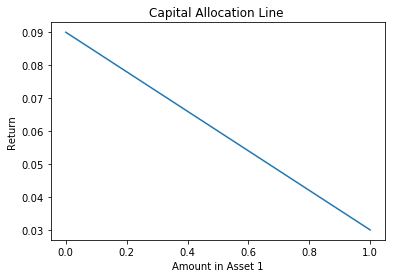

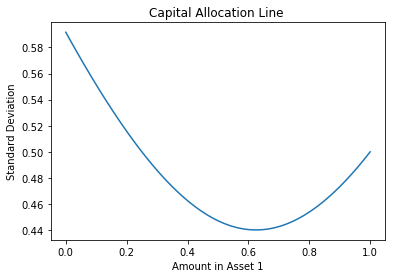

In [7]:
def CAL(ret1,ret2,var1,var2,cov):
    returns = [(1-x/100)*ret1+(x/100)*ret2 for x in range(0,101)]
    variances = [(1-x/100)**2*var1+(x/100)**2*var2+2*(1-x/100)*(x/100)*cov for x in range(0,101)]
    standardDevs = [x**.5 for x in variances]
    allocations = [(1-x/100) for x in range(0,101)]
    plt.plot(allocations,returns)
    plt.xlabel("Amount in Asset 1")
    plt.ylabel("Return")
    plt.title("Capital Allocation Line ")
    plt.show()
    plt.plot(allocations,standardDevs)
    plt.xlabel("Amount in Asset 1")
    plt.ylabel("Standard Deviation")
    plt.title("Capital Allocation Line ")
    plt.show()
CAL(.03,.09,.25,.35,.1)

In [8]:
print(100%3)

1


In [9]:
import scipy.optimize
def ourFunction(x):
    return (x-5)**2
print(scipy.optimize.minimize(ourFunction,1))

      fun: 1.6517868451916196e-16
 hess_inv: array([[ 0.5]])
      jac: array([ -1.08032108e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 4.99999999])


In [10]:
x = scipy.optimize.minimize(ourFunction,1)["x"]
print(x)
x = x[0]
print(ourFunction(x))

[ 4.99999999]
1.65178684519e-16


In [11]:
def ourFunction(x):
    return -(20-(x-5)**2)

x = scipy.optimize.minimize(ourFunction,1)["x"][0]
print(x)
print(ourFunction(x)*-1)

5.00000009924
20.0


In [12]:
con1 = {'type': 'ineq',
       'fun': lambda x: -(x-100)}
con2 = {'type': 'ineq',
       'fun': lambda x: x}

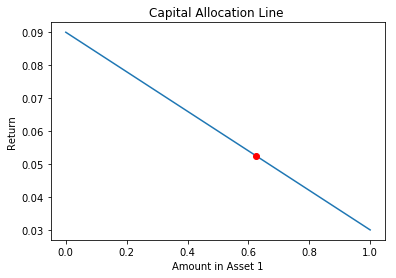

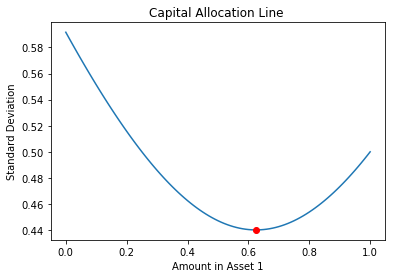

In [13]:
def CAL(ret1,ret2,var1,var2,cov):
    def portVar(x):
        return (1-x/100)**2*var1+(x/100)**2*var2+2*(1-x/100)*(x/100)*cov
    returns = [(1-x/100)*ret1+(x/100)*ret2 for x in range(0,101)]
    variances = [portVar(x) for x in range(0,101)]
    standardDevs = [x**.5 for x in variances]
    allocations = [(1-x/100) for x in range(0,101)]
    
    minVarX = scipy.optimize.minimize(portVar,0,constraints=[con1,con2])["x"][0]
    minVarSD = portVar(minVarX)**.5
    minVarReturn = (1-minVarX/100)*ret1+(minVarX/100)*ret2
    plt.plot(allocations,returns)
    plt.xlabel("Amount in Asset 1")
    plt.ylabel("Return")
    plt.title("Capital Allocation Line ")
    plt.plot(1-minVarX/100,minVarReturn,"ro")
    plt.show()
    

    plt.plot(allocations,standardDevs)
    plt.xlabel("Amount in Asset 1")
    plt.ylabel("Standard Deviation")
    plt.title("Capital Allocation Line ")
    plt.plot(1-minVarX/100,minVarSD,"ro")
    plt.show()
CAL(.03,.09,.25,.35,.1)

In [14]:
def utilityCAL(ret1,ret2,var1,var2,cov,A):
    returns = [(1-x/100)*ret1+(x/100)*ret2 for x in range(0,201)]
    variances = [(1-x/100)**2*var1+(x/100)**2*var2+2*(1-x/100)*(x/100)*cov for x in range(0,101)]
    utility = [x-.5*A*y for x,y in zip(returns,variances)]
    utility.reverse()
    standardDevs = [x**.5 for x in variances]
    allocations = [(1-x/100) for x in range(0,101)]
    
    plt.plot(allocations,utility)
    plt.xlabel("Amount in Asset 1")
    plt.ylabel("Utility")
    plt.show()

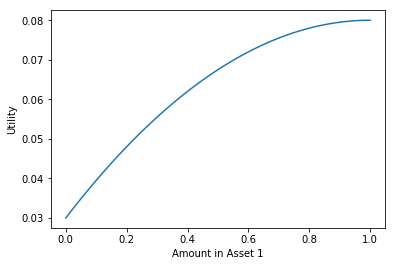

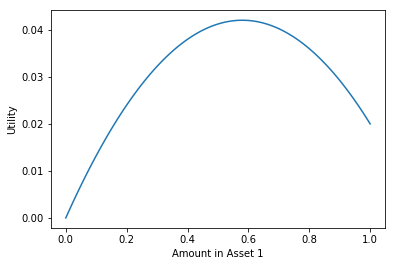

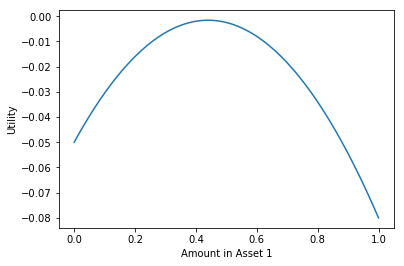

In [15]:
utilityCAL(.05,.12,.02,.04,.005,2)
utilityCAL(.05,.12,.02,.04,.005,5)
utilityCAL(.05,.12,.02,.04,.005,10)